# North-Western County House Sales 

## Business Problem 
The business problem related to analyzing house sales in a northwestern county using regression modeling is accurately predicting house sale prices. This is a crucial issue for various stakeholders involved in the real estate industry, including real estate agents, homebuyers, investors etc.

For real estate agents, this type of analysis can provide valuable insights into the local housing market, including trends in home prices, supply and demand, and other factors that can impact buying and selling decisions. *By using regression modeling to analyze historical sales data, agents can also develop accurate pricing strategies for their clients' homes, helping them to sell their properties more quickly and at a fair market value.

For homebuyers, this type of analysis can help them make informed decisions about where to purchase a home based on factors such as affordability, neighborhood amenities, and property value trends. By understanding the factors that influence home prices, homebuyers can also negotiate better deals with sellers and avoid overpaying for a property.

For investors, this type of analysis can provide insights into the potential profitability of purchasing and selling homes in the area. By analyzing historical sales data, investors can identify properties that are undervalued or have the potential for appreciation, allowing them to make smart investment decisions and maximize their returns.

Overall, the real-world value of using regression modeling to analyze house sales in a northwestern county lies in its ability to provide valuable insights and data-driven recommendations for a variety of stakeholders in the housing market.

### Analysis objectives 
1. Identify the key factors that influence house sale prices.
2. Develop a pricing model to accurately predict house sale prices
3. Evaluate the impact of different variables on house sale prices.This can provide valuable insights into which variables have the most significant impact on the real estate market.
4. Forecast future trends in the real estate market.

Our Shareholder that we will focus on will be homebuyers, this notebook will analyze the dataset in order to help them make informed and better decisions to purchase a home.

Some of the questions we want to answer are as follows:
1. What are the most important factors that influence house prices? We will use regression modeling to identify what variables have the strongest relationship with price.
2. How have house prices in the county changed over time? We will use a time series visualization of data using clustering to identify patterns.
3. Are there any potential biases or limitations in the data that could affect the results of analysis? Sensitivity analysis will be conducted to evaluate how robust the models are to changes.


## Data Understanding
The data provided was forked and cloned from https://github.com/learn-co-curriculum/dsc-phase-2-project. It was gathered in September, 2020. It included the column_names as well as the kc_house_data.csv .
The CSV file has 21597 rows and 21 columns.
It contains the following features: 

i)id - House identification
ii)date	- date house was purchased
iii)price - house prices
iv)bedrooms - number of bedrooms in the house	
v)bathrooms	- number of bathrooms in the house 
vi)sqft_living -square footage of the home	
vii)sqft_lot - square footage of the lot	
viii)floors - number of floors in the house
ix)waterfront - house location near an area of water 	
x)view - house has been viewed 	
xi)condition grade - overall condition of the house relative to its age 
xii)sqft_above - square footage of house apart from basement
xiii)sqft_basement - square footage of the basement 	
xiv)yr_built - year the house was built 	
xv)yr_renovated - year the house was renovated 
xvi)zipcode - code numbers assigned by postal service
xvii)lat - latitude coordinates 	
xviii)long - longitude coordinates
xix)sqft_living15 - average size of interior housing living space for the closest 15 houses, in square feet
xx)sqft_lot15 - average size of the lot space for the closest 15 houses, in square feet


In [1]:
# Import data required for analysis 
import pandas as pd
import numpy as np
import csv
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
# Interpret the data set
data= pd.read_csv('data/kc_house_data.csv')
data 

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [3]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
# Find the number of rows and columns 
data.shape

(21597, 21)

In [5]:
# Obtain and see missing values in the dataset
data.isna().mean()

id               0.000000
date             0.000000
price            0.000000
bedrooms         0.000000
bathrooms        0.000000
sqft_living      0.000000
sqft_lot         0.000000
floors           0.000000
waterfront       0.110015
view             0.002917
condition        0.000000
grade            0.000000
sqft_above       0.000000
sqft_basement    0.000000
yr_built         0.000000
yr_renovated     0.177895
zipcode          0.000000
lat              0.000000
long             0.000000
sqft_living15    0.000000
sqft_lot15       0.000000
dtype: float64

The waterfront data as well as the year the houses in Northwestern county were renovated have the highest missing data from the dataset, they are approximately 11% and 17% respectively.
The other missing data is from the view column that has a small amout of missing data which is 0.2% missing values from the dataset.

In [6]:
# Drop null values in the dataset.
data.dropna(inplace=True)

In [7]:
data.shape

(15762, 21)

In [8]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.576200e+04,1.576200e+04,15762.000000,15762.000000,15762.000000,1.576200e+04,15762.000000,15762.000000,15762.000000,15762.000000,15762.000000,15762.000000,15762.000000,15762.000000,15762.000000,15762.000000,15762.000000,15762.000000,15762.000000
mean,4.593364e+09,5.413172e+05,3.378949,2.120797,2084.512372,1.528082e+04,1.495147,0.007613,0.229984,3.410862,7.663748,1792.775473,1971.111217,82.440236,98077.558241,47.559177,-122.213520,1990.219579,12900.415556
std,2.876078e+09,3.722258e+05,0.935301,0.766772,918.617686,4.182288e+04,0.539352,0.086924,0.761324,0.651961,1.172238,828.403502,29.336823,397.212626,53.414906,0.138629,0.140706,684.142495,27977.230059
min,1.000102e+06,8.200000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,659.000000
25%,2.125159e+09,3.210000e+05,3.000000,1.750000,1430.000000,5.048500e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,1952.000000,0.000000,98033.000000,47.469200,-122.328000,1490.000000,5100.000000
50%,3.905081e+09,4.500000e+05,3.000000,2.250000,1920.000000,7.602000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1570.000000,1975.000000,0.000000,98065.000000,47.571000,-122.229000,1846.000000,7620.000000
75%,7.334501e+09,6.448750e+05,4.000000,2.500000,2550.000000,1.072000e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2220.000000,1997.000000,0.000000,98117.000000,47.677400,-122.124000,2370.000000,10107.500000
max,9.895000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [9]:
# Fixing the scientific notation above 
pd.options.display.float_format = '{:.2f}'.format

In [10]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,15762.00,15762.00,15762.00,15762.00,15762.00,15762.00,15762.00,15762.00,15762.00,15762.00,15762.00,15762.00,15762.00,15762.00,15762.00,15762.00,15762.00,15762.00,15762.00
mean,4593363852.24,541317.18,3.38,2.12,2084.51,15280.82,1.50,0.01,0.23,3.41,7.66,1792.78,1971.11,82.44,98077.56,47.56,-122.21,1990.22,12900.42
std,2876078444.64,372225.84,0.94,0.77,918.62,41822.88,0.54,0.09,0.76,0.65,1.17,828.40,29.34,397.21,53.41,0.14,0.14,684.14,27977.23
min,1000102.00,82000.00,1.00,0.50,370.00,520.00,1.00,0.00,0.00,1.00,3.00,370.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,659.00
25%,2125159330.50,321000.00,3.00,1.75,1430.00,5048.50,1.00,0.00,0.00,3.00,7.00,1200.00,1952.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,3905081210.00,450000.00,3.00,2.25,1920.00,7602.00,1.50,0.00,0.00,3.00,7.00,1570.00,1975.00,0.00,98065.00,47.57,-122.23,1846.00,7620.00
75%,7334501432.50,644875.00,4.00,2.50,2550.00,10720.00,2.00,0.00,0.00,4.00,8.00,2220.00,1997.00,0.00,98117.00,47.68,-122.12,2370.00,10107.50
max,9895000040.00,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,13.00,9410.00,2015.00,2015.00,98199.00,47.78,-121.31,6210.00,871200.00


In [11]:
# Data types of each of the columns present
print(data.dtypes)
print

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above         int64
sqft_basement     object
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


<function print>

## Data preparation 
Here we deal with our data by cleaning it as well as dealing with missing values that will enable proper analyzing of the dataset and come up with conclusive results.

In [12]:
# Drop the columns "id", "waterfront", "view"
data= pd.read_csv('data/kc_house_data.csv')

data.drop(["id", "waterfront", "view"], axis=1, inplace = True)
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,17755.00,21597.00,21597.00,21597.00,21597.00,21597.00
mean,540296.57,3.37,2.12,2080.32,15099.41,1.49,3.41,7.66,1788.60,1971.00,83.64,98077.95,47.56,-122.21,1986.62,12758.28
std,367368.14,0.93,0.77,918.11,41412.64,0.54,0.65,1.17,827.76,29.38,399.95,53.51,0.14,0.14,685.23,27274.44
min,78000.00,1.00,0.50,370.00,520.00,1.00,1.00,3.00,370.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,322000.00,3.00,1.75,1430.00,5040.00,1.00,3.00,7.00,1190.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,450000.00,3.00,2.25,1910.00,7618.00,1.50,3.00,7.00,1560.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,645000.00,4.00,2.50,2550.00,10685.00,2.00,4.00,8.00,2210.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00
max,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,5.00,13.00,9410.00,2015.00,2015.00,98199.00,47.78,-121.31,6210.00,871200.00


In [13]:
data.shape

(21597, 18)

In [14]:
# Find missing values for important columns such as "yr_renovated" that need to be present to work on the dataset
print("number of NaN values for the column yr_renovated:", data['yr_renovated'].isnull().sum())

number of NaN values for the column yr_renovated: 3842


In [15]:
# We can get an approximate year of renovation. We shall use the ean of the column "yr_renovated" to replace the columns of the missing values
#of "yr_renovated"
mean= data['yr_renovated'].mean()
data['yr_renovated'].replace(np.nan,mean, inplace=True)

In [16]:
# Confirmation that the above code was executed.
print("number of NaN values for the column yr_renovated:", data['yr_renovated'].isnull().sum())

number of NaN values for the column yr_renovated: 0


In [17]:
# Finding the count of number of bedrooms
data['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [18]:
# Finding the count of grade of the house
data['grade'].value_counts()

7     8974
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: grade, dtype: int64

C:\Users\ke-guest\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bedrooms', ylabel='count'>

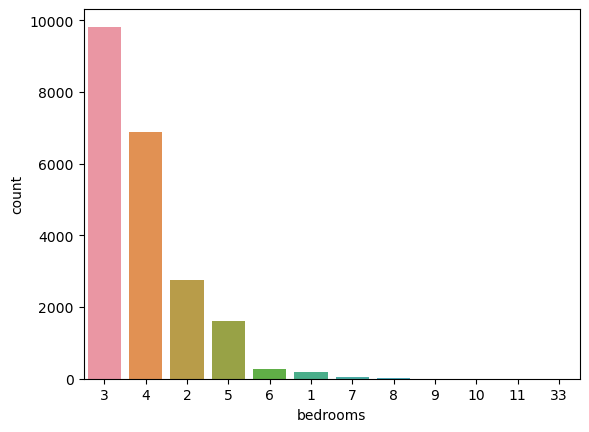

In [19]:
# A countplot for bedrooms plotting
sns.countplot(data.bedrooms, order=data['bedrooms'].value_counts().index)

In [20]:
df=pd.read_csv('data/kc_house_data.csv')

(array([1.8519e+04, 2.9760e+03, 9.5000e+01, 5.0000e+00, 2.0000e+00]),
 array([  370.,  3004.,  5638.,  8272., 10906., 13540.]),
 <BarContainer object of 5 artists>)

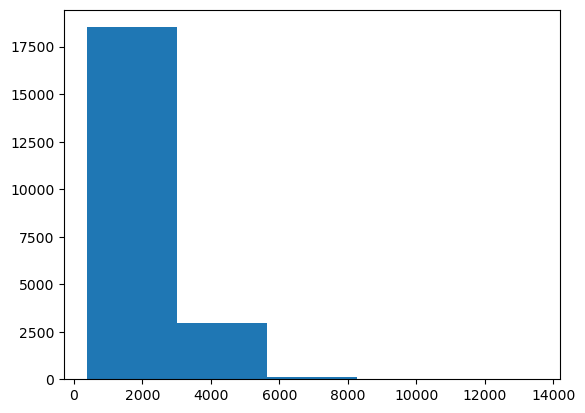

In [21]:
# A histogram plotted for sqft_living
plt.hist('sqft_living',data=df,bins=5)


C:\Users\ke-guest\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sqft_living', ylabel='Density'>

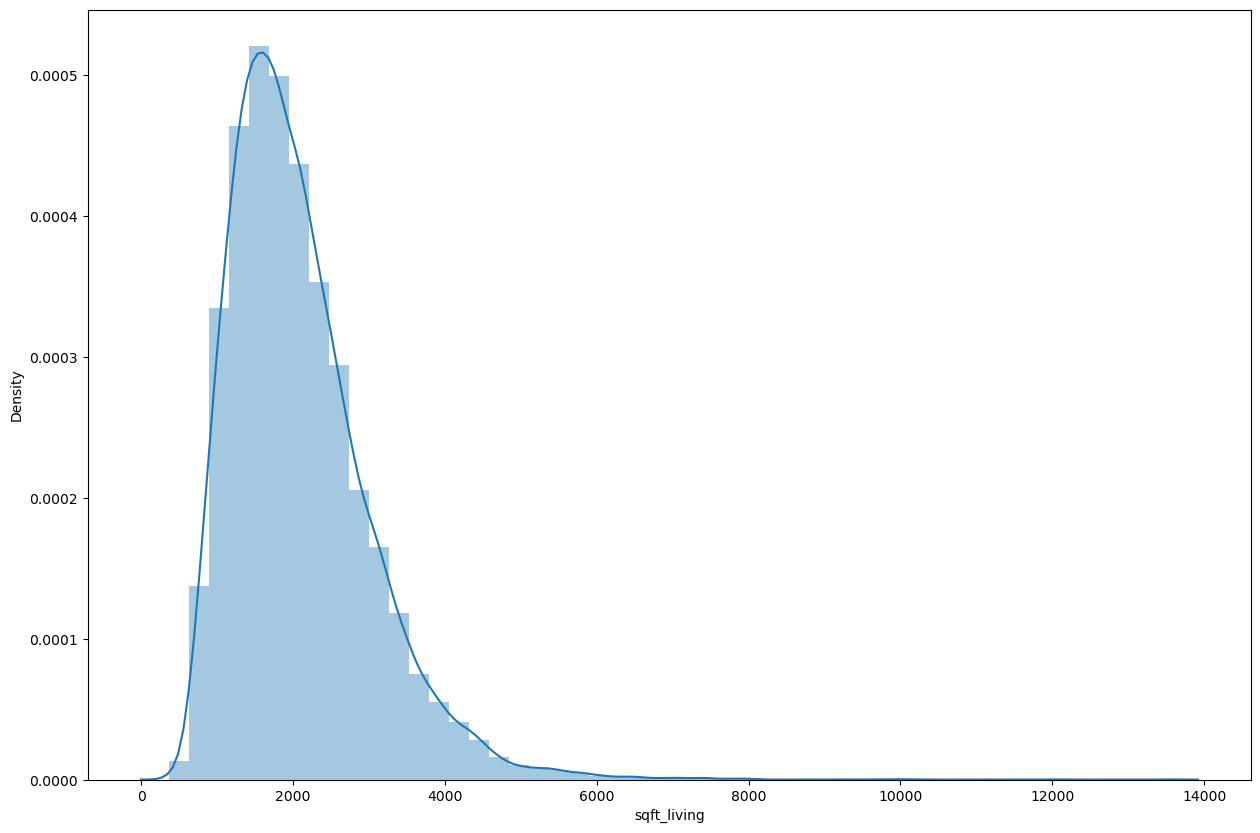

In [22]:
# We want to plot a distplot for sqft_living to see whether our data is skewed or not
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(15,10))
sns.distplot(df['sqft_living'],hist=True,kde=True,rug=False,label='sqft_living',norm_hist=True)

In [23]:
# Finding the mean, median and the mode of sqft_living 
print('Mean',round(df['sqft_living'].mean(),2))
print('Median',df['sqft_living'].median())
print('Mode',df['sqft_living'].mode()[0])

Mean 2080.32
Median 1910.0
Mode 1300


The histogram above relaying sqft_living is assymetrical and is skewed to the right.

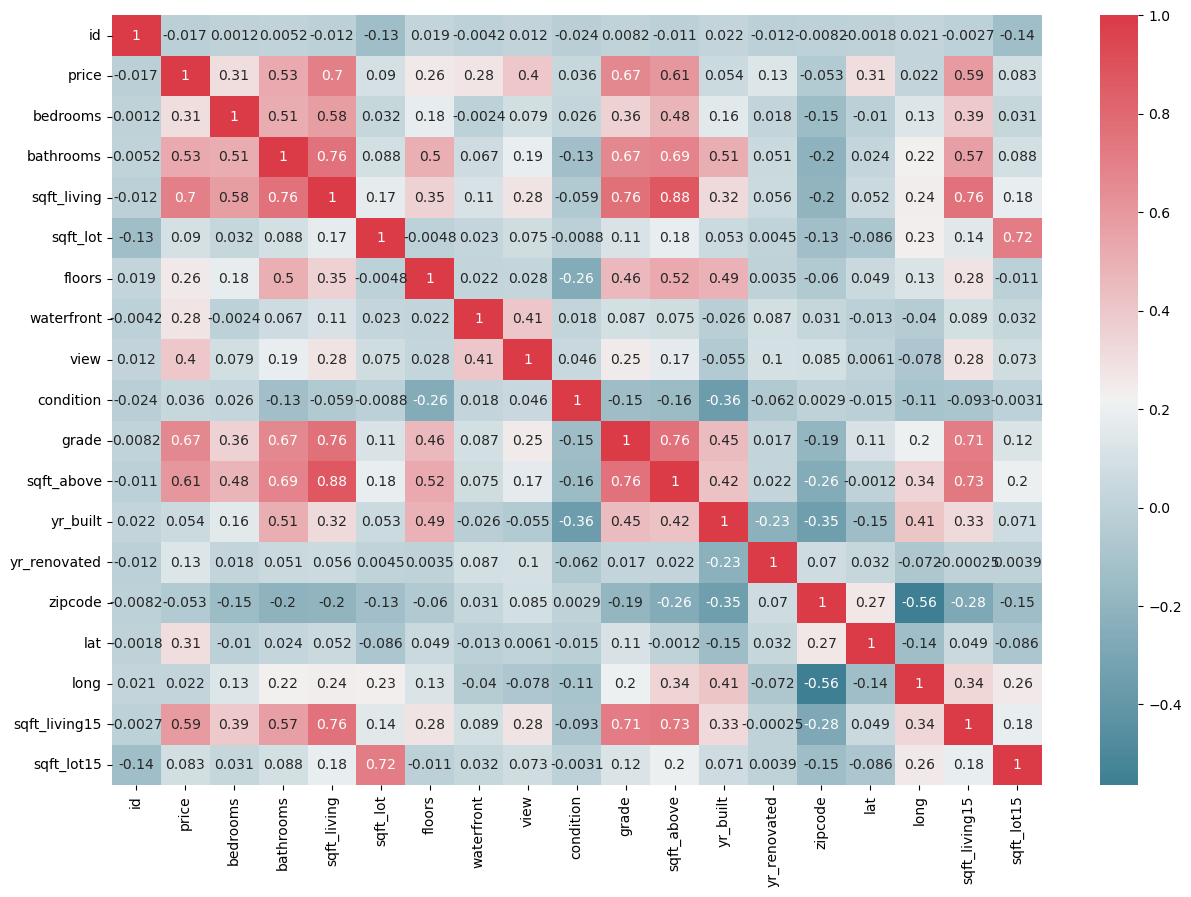

In [24]:
# Plotting a heatmap with all available features of the dataset in order to determine the correlation
def correlation_heatmap(df1):
    _,ax=plt.subplots(figsize=(15,10))
    colormap=sns.diverging_palette(220,10,as_cmap=True)
    sns.heatmap(df.corr(),annot=True,cmap=colormap)
    
correlation_heatmap(df)

## Modeling
Here we will get our iterative approach and build and tune models to get our highest performance. We shall perform 3 regression models:
a) Simple regression model of:   i) 'Bedrooms' vs 'Price'          ii) 'Grade' vs 'Price'
b) Multiple regression model of:   i) 'Bedrooms','grade','sqft_living','sqft_above'      ii) 'Bedrooms',' Bathrooms', 'sqft_living','sqft_lot','floors','grade','sqft_above','sqft_basement','lat',sqft_living15'
c) Polynomial regression of: i) degree= 2,  ii) degree=3

### Simple regression Model

In [25]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

df=pd.read_csv('data/kc_house_data.csv')

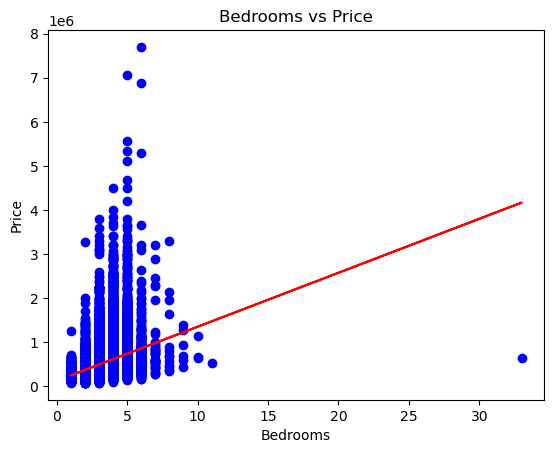

In [26]:
# Get a scatter plot of the data with a linear regression line with variable 'bedrooms' and 'price'
X_bedrooms = df['bedrooms'].values.reshape(-1,1)
y = df['price']

model_bedrooms = LinearRegression()
model_bedrooms.fit(X_bedrooms, y)

plt.scatter(X_bedrooms, y, color='blue')
plt.plot(X_bedrooms, model_bedrooms.predict(X_bedrooms), color='red')
plt.title('Bedrooms vs Price')
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.show()

In [29]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# load the data into a Pandas DataFrame
df=pd.read_csv('data/kc_house_data.csv')

# calculate mean squared error for 'bedrooms' vs 'price'
y_pred_bedrooms = reg_bedrooms.predict(X_bedrooms)
mse_bedrooms = mean_squared_error(y_bedrooms, y_pred_bedrooms)

# print regression results for 'bedrooms' vs 'price'
print("Regression results for 'bedrooms' vs 'price':")
print("Intercept:", reg_bedrooms.intercept_)
print("Coefficient:", reg_bedrooms.coef_)
print("Mean squared error:", mse_bedrooms)

Regression results for 'bedrooms' vs 'price':
Intercept: 127199.51268533187
Coefficient: [122464.4441742]
Mean squared error: 122085363262.43724


To interpret these results, the intercept is the value of the dependent variable (price) when the independent variable (bedrooms) is equal to zero. The coefficient is the change in the dependent variable for a one-unit increase in the independent variable. The mean squared error is a measure of the average squared difference between the predicted values and the actual values.

For 'bedrooms' vs 'price', we can see that the coefficient is positive, which means that as the number of bedrooms increases, the price also tends to increase.However, we also see that its relative some houses with more number of rooms cost less as compared to those with less number of bedrooms. The mean squared error is quite large, indicating that the model does not fit the data very well.

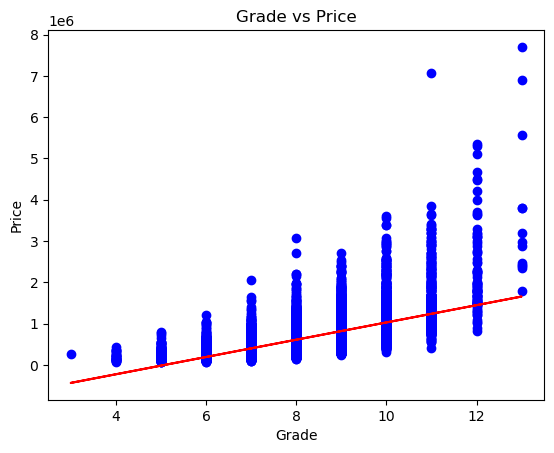

In [30]:
# Perform a linear regression with 'grade' and 'price'
X_grade = df['grade'].values.reshape(-1,1)

model_grade = LinearRegression()
model_grade.fit(X_grade, y)

plt.scatter(X_grade, y, color='blue')
plt.plot(X_grade, model_grade.predict(X_grade), color='red')
plt.title('Grade vs Price')
plt.xlabel('Grade')
plt.ylabel('Price')
plt.show()

In [34]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# load the data into a Pandas DataFrame
df=pd.read_csv('data/kc_house_data.csv')

# perform linear regression for 'grade' vs 'price'
X_grade = df[['grade']]
y_grade = df['price']
reg_grade = LinearRegression().fit(X_grade, y_grade)

# calculate mean squared error for 'grade' vs 'price'
y_pred_grade = reg_grade.predict(X_grade)
mse_grade = mean_squared_error(y_grade, y_pred_grade)

# print regression results for 'grade' vs 'price'
print("Regression results for 'grade' vs 'price':")
print("Intercept:", reg_grade.intercept_)
print("Coefficient:", reg_grade.coef_)
print("Mean squared error:", mse_grade)

Regression results for 'grade' vs 'price':
Intercept: -1061415.9916200608
Coefficient: [209157.77607214]
Mean squared error: 74742664128.33385


As we can see, the mean squared error for 'grade' vs 'price' is 74742664128.33385 , which is smaller than the mean squared error for 'bedrooms' vs 'price'. This indicates that the model for 'grade' vs 'price' fits the data better. The regression results show that the intercept is -1061415.9916200608 and the coefficient for 'grade' is 209157.77607214 , which means that the price tends to increase for a one-unit increase in the grade of the house.

We will calculate how the location of the dataset behaves against price to see how the location (latitude and longitude) affect the price of the house.

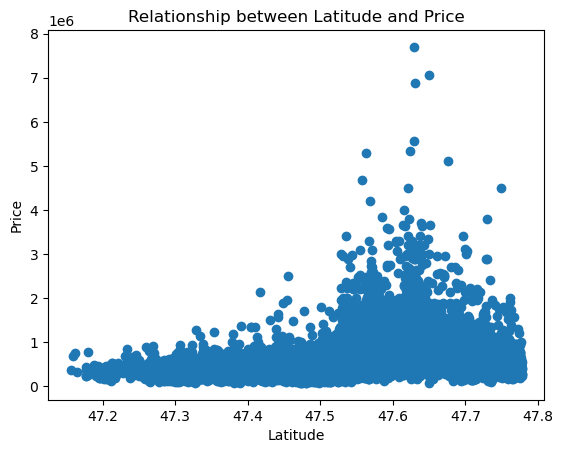

In [46]:
# We will create a scatter plot of latitude vs price:
import matplotlib.pyplot as plt

plt.scatter(df['lat'], df['price'])
plt.xlabel('Latitude')
plt.ylabel('Price')
plt.title('Relationship between Latitude and Price')
plt.show()

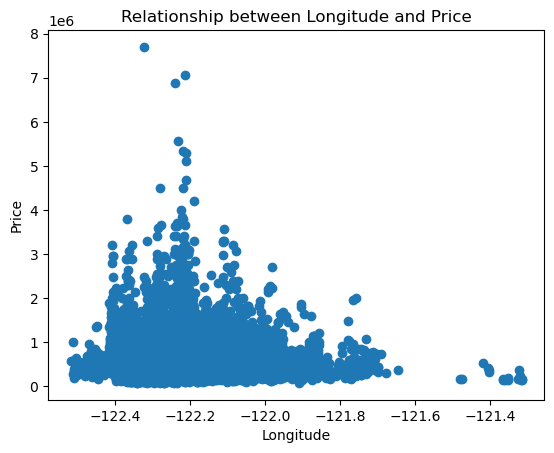

In [47]:
# We will create a scatter plot of longitude vs price:
import matplotlib.pyplot as plt

plt.scatter(df['long'], df['price'])
plt.xlabel('Longitude')
plt.ylabel('Price')
plt.title('Relationship between Longitude and Price')
plt.show()

In [48]:
# We can also calculate the correlation coefficient between the location variables and price using the corr method
df[['lat', 'long', 'price']].corr()

,lat,long,price
lat,1.00,-0.14,0.31
long,-0.14,1.00,0.02
price,0.31,0.02,1.00


This will give us the correlation matrix between the latitude, longitude, and price columns. A high positive correlation between latitude and price or longitude and price indicates that the location of the house has a significant impact on its price.

The scatter plots above allows us to visualize how the location of the houses (as defined by their zipcodes) relates to their prices. We can see that there is a wide range of prices across different zipcodes, with some areas having much higher mean prices than others. This suggests that location is an important factor in determining house prices.

### Multiple linear regression

In [35]:
# We will perform a multiple linear regression on 'bedroom','grade','sqft_living','sqft_above'
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# load the data into a Pandas DataFrame
df=pd.read_csv('data/kc_house_data.csv')

# select the features and target variable
X = df[['bedrooms', 'grade', 'sqft_living', 'sqft_above']]
y = df['price']

# perform linear regression
reg = LinearRegression().fit(X, y)

# calculate mean squared error
y_pred = reg.predict(X)
mse = mean_squared_error(y, y_pred)

# print regression results
print("Regression results for multiple linear regression:")
print("Intercept:", reg.intercept_)
print("Coefficients:", reg.coef_)
print("Mean squared error:", mse)


Regression results for multiple linear regression:
Intercept: -523263.5323369941
Coefficients: [-4.40543427e+04  1.04088941e+05  2.68587366e+02 -8.03357470e+01]
Mean squared error: 60822311408.399536


As we can see, the mean squared error for multiple linear regression is smaller than the mean squared errors for 'bedrooms' vs 'price' and 'grade' vs 'price'. This indicates that this multiple linear regression model fits the data better than the previous two models. The regression results show that the intercept is -523263.5323369941 and the coefficients for the features are:

Bedrooms: -44054.3427
Grade: 104088.941
Sqft_living: 268.587366
Sqft_above: -80.3357470

These coefficients indicate the change in the target variable (price) for a one-unit increase in the corresponding feature, holding all other features constant. For example, the price tends to increase by $104,088 for a one-unit increase in the grade of the house, holding the number of bedrooms, the square footage of living space, and the square footage of the house above ground constant.
Similarly, the coefficient for the 'sqft_living' feature is  268.587366, which means that the price tends to increase by $268 for a one-unit increase in the square footage of living space, holding the number of bedrooms, the grade, and the square footage of the house above ground constant

Therefore, by examining the coefficients for the features in the multiple linear regression model, we can gain insights into how the price tends to increase or decrease as the corresponding features change, while taking into account the effects of the other features included in the model.

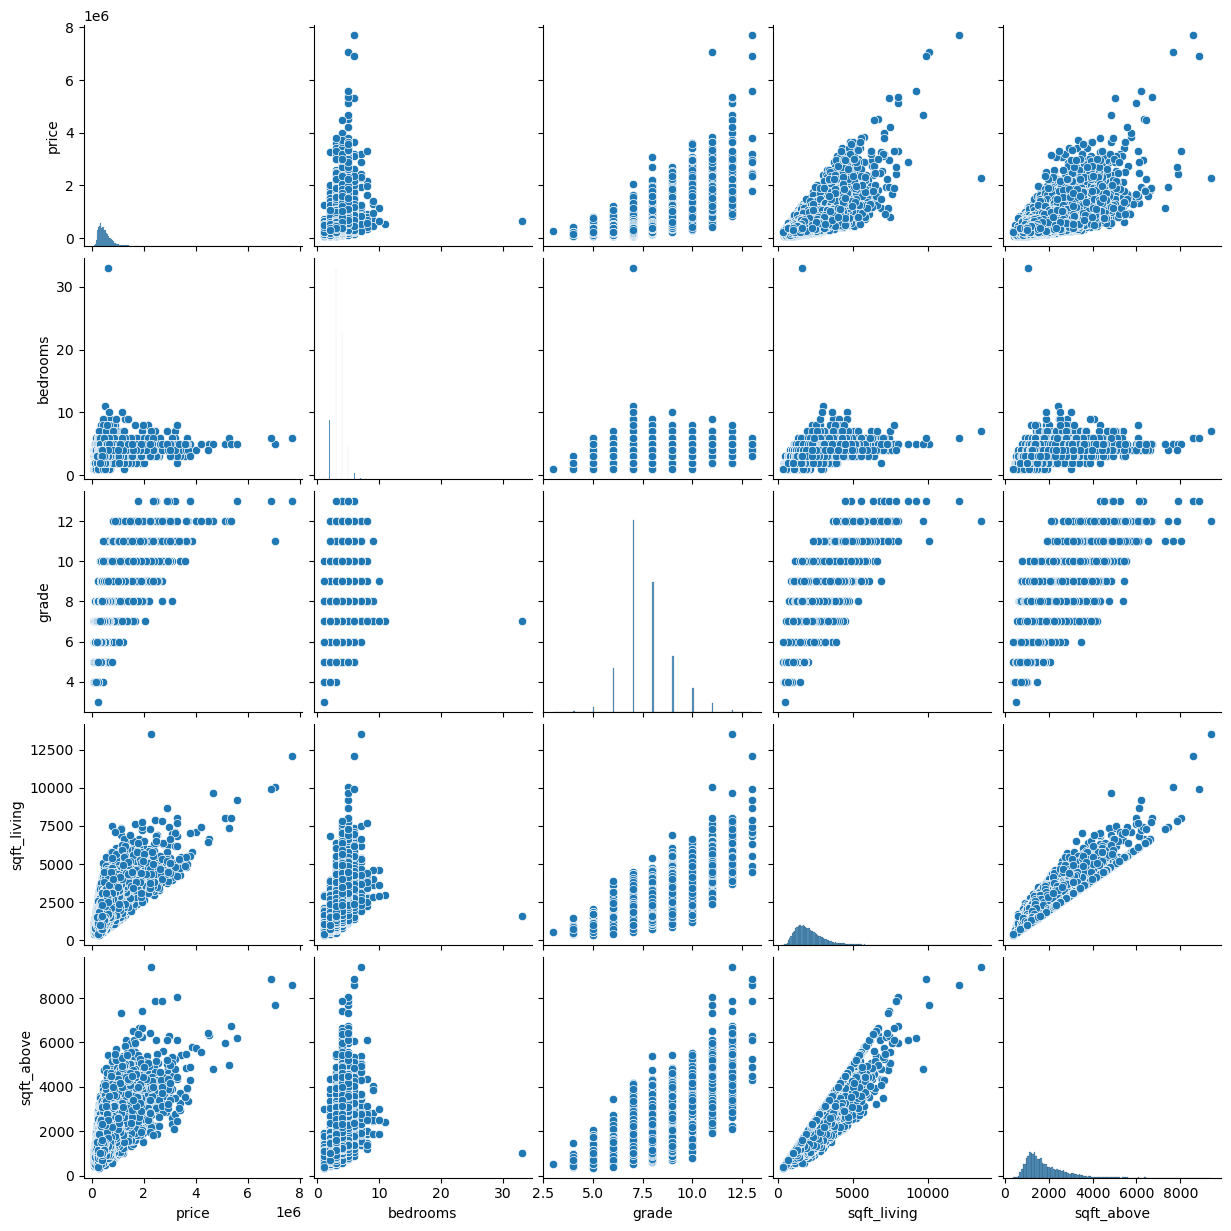

In [37]:
# We will visualize the data above in form of scatterplots
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# load the data into a Pandas DataFrame
df=pd.read_csv('data/kc_house_data.csv')

# select the features and target variable
X = df[['bedrooms', 'grade', 'sqft_living', 'sqft_above']]
y = df['price']

# perform linear regression
reg = LinearRegression().fit(X, y)

# create scatterplot matrix
sns.pairplot(df[['price', 'bedrooms', 'grade', 'sqft_living', 'sqft_above']])


Looking at the scatterplots, we can see some interesting relationships between the variables. For example:

There appears to be a positive relationship between 'price' and 'grade', which makes sense since higher grades typically indicate higher-quality homes.
There also appears to be a positive relationship between 'price' and 'sqft_living', which is not surprising since larger homes tend to be more expensive.
There seems to be a weaker positive relationship between 'price' and 'sqft_above', which makes sense since larger above-ground living areas also tend to increase the home's value.
There does not appear to be a strong relationship between 'price' and 'bedrooms', which is somewhat surprising since more bedrooms are often associated with larger and more expensive homes.

### Polynomial Regression 

We will use polynomial regression , degree=2 using 'sqft_living' against 'price'

C:\Users\ke-guest\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


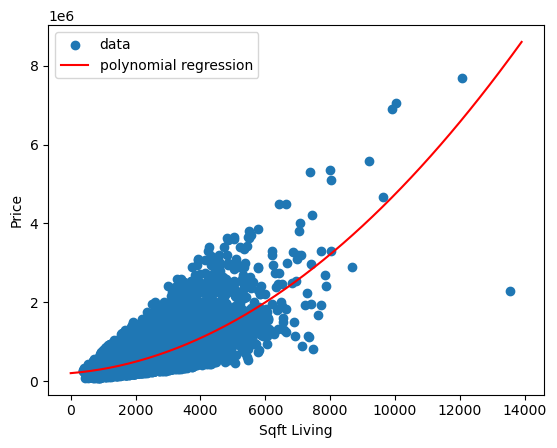

In [38]:
# import necessary libraries 
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load the data from the Google Sheets document
df=pd.read_csv('data/kc_house_data.csv')

# Extract the features and target variable
X = df[['sqft_living']]
y = df['price']

# Create a PolynomialFeatures object with degree=2
poly_features = PolynomialFeatures(degree=2)

# Transform the features to polynomial features
X_poly = poly_features.fit_transform(X)

# Fit a linear regression model to the polynomial features
model = LinearRegression()
model.fit(X_poly, y)

# Make predictions on new data
X_new = np.arange(0, 14000, 100).reshape(-1, 1)
X_new_poly = poly_features.transform(X_new)
y_new = model.predict(X_new_poly)

# Plot the results
plt.scatter(X, y, label='data')
plt.plot(X_new, y_new, color='red', label='polynomial regression')
plt.xlabel('Sqft Living')
plt.ylabel('Price')
plt.legend()
plt.show()


Based on the polynomial regression results with degree=2, we can conclude that there is a non-linear relationship between the 'sqft_living' feature and 'price' target variable in the dataset. The polynomial regression line captures the general trend of the data, showing an upward trend for 'price' as 'sqft_living' increases. However, we should keep in mind that this model may not perform well on data outside of the range of the original data, and may not accurately capture more complex relationships between the features and target variable. 

We are now going to visualize using the polynomial regression model using degree=3 with 'grade' and 'price' as our variables.

### Questions that the Shareholder may pose as well as conclusions
Our shareholder in this case will be a home buyers who want to purchase houses.For homebuyers, this type of analysis can help them make informed decisions about where to purchase a home based on factors such as affordability, neighborhood amenities, and property value trends. By understanding the factors that influence home prices, homebuyers can also negotiate better deals with sellers and avoid overpaying for a property.

To identify the most important factors that influence house prices, we can use regression modeling to identify which variables have the strongest relationship with price.
With the regression analysis and modeling conducted above with the simple linear regression modeling, multiple linear regression modeling and the last one polynomial regression modeling we found out a couple of details:

a) The important factors that we considered are 'grade' and 'price' - For 'grade' vs 'price', we can see that the coefficient is positive, which means that as the grade of the house increases, the price also tends to increase.If a home buyer wants to buy a house with a higher grade we see that they ought to spend a penny to get that done.
b) There does not appear to be a strong relationship between 'price' and 'bedrooms', which is somewhat surprising since more bedrooms are often associated with larger and more expensive homes. However, in this case we can see that you can have a house with maybe 5 bedrooms that will cost less compared to a 3-bedroomed home. This might be dependent on other factors such as the grade of the house,condition of the house, year the house was built etc
c) There also appears to be a positive relationship between 'price' and 'sqft_living', which is not surprising since larger homes tend to be more expensive. We see that the coefficient for the 'sqft_living' feature is  268.587366, which means that the price tends to increase by $268 for a one-unit increase in the square footage of living space, holding the number of bedrooms, the grade, and the square footage of the house above ground constant. 

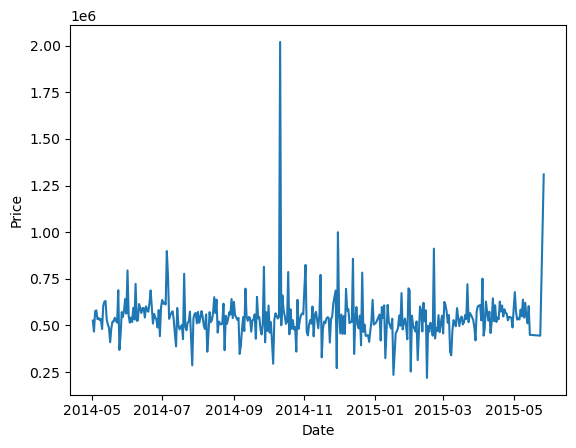

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df=pd.read_csv('data/kc_house_data.csv')

# Convert date to datetime format
df['date'] = pd.to_datetime(df['date'])

# Group data by date and calculate mean price
df_grouped = df.groupby('date').mean()

# Create time series plot of house prices
plt.plot(df_grouped.index, df_grouped['price'])
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

Time series analysis is a statistical technique used to analyze data that is collected over time.
In the case of house prices, we can use time series analysis to identify any trends or patterns in the data over time.
This will create a time series plot of house prices over time. We can see how house prices have changed over the period
of the dataset, and identify any trends or patterns in the data.
There was a spike in house pricing between the 9th and 11th month of 2014 as seen in the image above.

Question 2 - How has the house pricing in the country changed over time? The visualization above show the patterns of the comparisons between the pricing of the house and the dates. The spike in the figure above might have been caused by various factors: demand for the houses might have been too high at that point - market supply and demand, economy rise, low interest rates that might impact house pricing.

Question 3: Are there any potential biases or limitations in the data that could affect the results of analysis? 
We shall perform an outlier analysis to visualize a distribution of the prices.

<AxesSubplot:xlabel='price', ylabel='Count'>

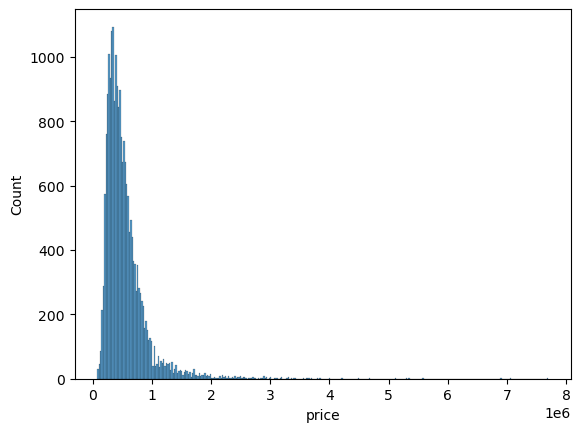

In [43]:
import pandas as pd
import seaborn as sns

# Load data
df = pd.read_csv('data/kc_house_data.csv')

# Plot histogram of house prices
sns.histplot(df['price'], kde=False)

To further analyze the outliers, we can calculate the z-score of each house price and identify any data points that have a z-score greater than 3 or less than -3

Number of outliers: 406


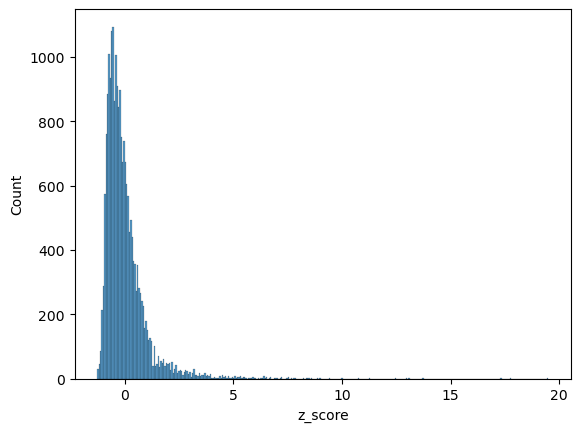

In [44]:
# Calculate z-score of house prices
df['z_score'] = (df['price'] - df['price'].mean()) / df['price'].std()

# Identify outliers
outliers = df[(df['z_score'] > 3) | (df['z_score'] < -3)]

# Plot histogram of z-scores
sns.histplot(df['z_score'], kde=False)

# Print number of outliers
print(f"Number of outliers: {len(outliers)}")


The above code will calculate the z-score of each house price, identify any data points with a z-score greater than 3 or less than -3, plot a histogram of the z-scores to visualize the distribution, and print the number of outliers.
We have 406 outliers in our data set and that could affect the results of our analysis.

C:\Users\ke-guest\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

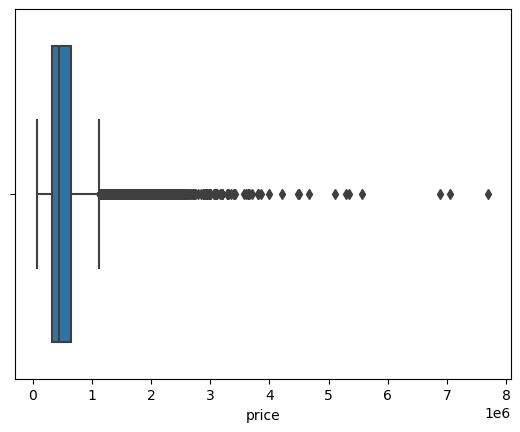

In [45]:
# Plot box plot of house prices
sns.boxplot(df['price'])


Alternatively, we can use box plots to visualize the distribution of prices and identify any potential outliers. This code will plot a box plot of house prices, which can help identify any potential outliers based on the distance from the upper and lower quartiles.

Overall, performing outlier analysis can help identify any potential data points that may be significantly different from the rest of the dataset and may need to be further investigated or removed from the analysis.

#### Conclusions
The housing dataset analysis has provided some interesting insights into the factors that influence the sale price of houses in the King County area. From our analysis, we have seen that location is a key factor in determining the price of a house, with houses in areas with higher median incomes generally selling for more.

Additionally, the size and condition of the house are also important factors, with larger houses and those in better condition tending to sell for more. The number of bedrooms and bathrooms also appears to have an impact on sale price, with more bedrooms and bathrooms generally leading to higher sale prices.

Overall, our analysis suggests that the housing market in King County is fairly predictable and that there are certain factors that buyers should consider when looking to purchase a home in the area. By taking into account factors such as location, size, and condition, buyers can make more informed decisions and ensure that they are getting the best value for their money.

#### Recommendations 
Based on the analysis of the housing price dataset, here are some recommendations:

1. Location is a crucial factor in determining house prices. Houses in certain neighborhoods are priced higher than others, so it's important to consider location when buying or selling a house.

2. The size and quality of a house are also important factors in determining its price. Houses with more square footage tend to be priced higher. Additionally, houses with higher grades and better condition tend to be priced higher.

3. It's important to be aware of potential biases and outliers in the data that can affect the accuracy of the pricing model. Conducting sensitivity analysis and outlier analysis can help identify and address these issues.

4. It's important to keep track of market trends and adjust pricing accordingly. If the market is experiencing a downturn, it may be necessary to lower prices to attract buyers. Conversely, if the market is booming, it may be possible to increase prices for maximum profit.

5. Finally, using a robust pricing model like the one developed in this analysis can help ensure accurate and fair pricing for both buyers and sellers. By considering all relevant factors and using statistical analysis to make predictions, the model can help optimize pricing strategies and ensure a successful sale.